In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('swiid9_8_summary.csv')
data.head(10)

,country,year,gini_disp,gini_disp_se,gini_mkt,gini_mkt_se,abs_red,abs_red_se,rel_red,rel_red_se
0,Afghanistan,2007,31.6,3.12,33.2,3.53,NaN,NaN,NaN,NaN
1,Afghanistan,2008,31.6,3.06,33.2,3.47,NaN,NaN,NaN,NaN
2,Afghanistan,2009,31.6,3.08,33.3,3.50,NaN,NaN,NaN,NaN
3,Afghanistan,2010,31.7,3.12,33.3,3.53,NaN,NaN,NaN,NaN
4,Afghanistan,2011,31.7,3.13,33.4,3.56,NaN,NaN,NaN,NaN
5,Afghanistan,2012,31.8,3.15,33.4,3.60,NaN,NaN,NaN,NaN
6,Afghanistan,2013,31.8,3.29,33.4,3.71,NaN,NaN,NaN,NaN
7,Afghanistan,2014,31.8,3.41,33.4,3.82,NaN,NaN,NaN,NaN
8,Afghanistan,2015,31.8,3.50,33.4,3.90,NaN,NaN,NaN,NaN
9,Afghanistan,2016,31.8,3.60,33.4,3.97,NaN,NaN,NaN,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       6398 non-null   object 
 1   year          6398 non-null   int64  
 2   gini_disp     6398 non-null   float64
 3   gini_disp_se  6398 non-null   float64
 4   gini_mkt      6398 non-null   float64
 5   gini_mkt_se   6398 non-null   float64
 6   abs_red       2685 non-null   float64
 7   abs_red_se    2685 non-null   float64
 8   rel_red       2685 non-null   float64
 9   rel_red_se    2685 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 500.0+ KB


In [18]:
data.isnull().sum()

country            0
year               0
gini_disp          0
gini_disp_se       0
gini_mkt           0
gini_mkt_se        0
abs_red         3713
abs_red_se      3713
rel_red         3713
rel_red_se      3713
dtype: int64

In [19]:
columns_to_keep = ["country", "year", "gini_disp", "gini_mkt"]
data = data[columns_to_keep]

In [20]:
data.describe()

,year,gini_disp,gini_mkt
count,6398.000000,6398.000000,6398.000000
mean,1999.792591,38.174695,45.353423
std,14.279769,8.554001,6.437102
min,1960.000000,16.700000,27.400000
25%,1990.250000,31.700000,40.800000
50%,2002.000000,38.300000,45.300000
75%,2011.000000,43.900000,49.200000
max,2023.000000,65.200000,72.500000


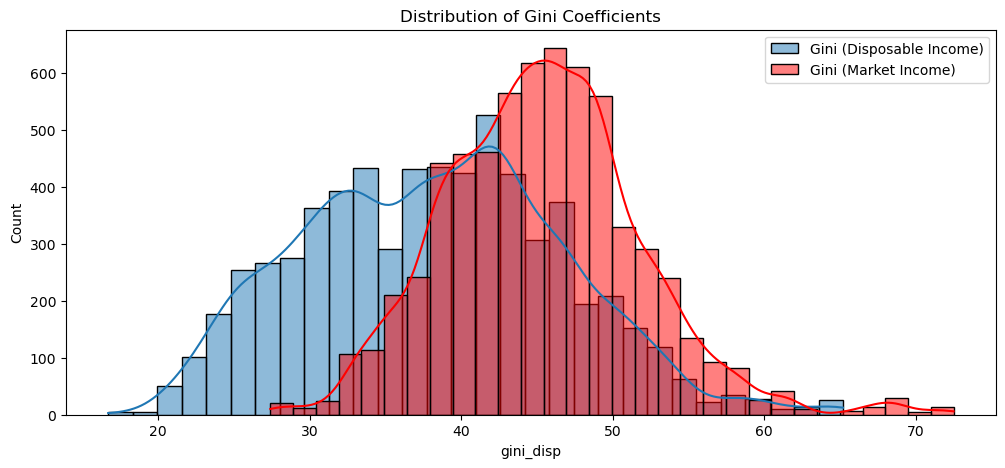

In [21]:
plt.figure(figsize=(12, 5))
sns.histplot(data["gini_disp"].dropna(), bins=30, kde=True, label="Gini (Disposable Income)")
sns.histplot(data["gini_mkt"].dropna(), bins=30, kde=True, color="red", label="Gini (Market Income)")
plt.legend()
plt.title("Distribution of Gini Coefficients")
plt.show()

In [22]:
from scipy.stats import ttest_rel

# Perform a paired t-test to compare Gini coefficients before and after redistribution
t_stat, p_value = ttest_rel(data["gini_mkt"], data["gini_disp"])

# Display the results
t_stat, p_value


(83.16980668420835, 0.0)

In [23]:
import statsmodels.formula.api as smf

# Create an OLS model using formula notation
model = smf.ols("gini_disp ~ gini_mkt", data=data).fit()

# Display regression results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              gini_disp   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     3748.
Date:                Wed, 12 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:37:32   Log-Likelihood:                -21335.
No. Observations:                6398   AIC:                         4.267e+04
Df Residuals:                    6396   BIC:                         4.269e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5399      0.604      2.548      0.0

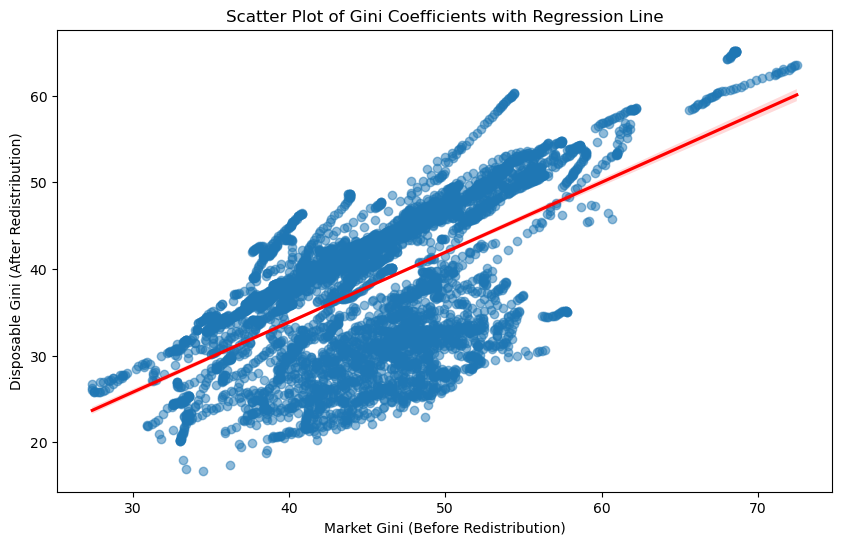

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot with regression trend line
plt.figure(figsize=(10, 6))
sns.regplot(x=data["gini_mkt"], y=data["gini_disp"], 
            scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Labels and title
plt.xlabel("Market Gini (Before Redistribution)")
plt.ylabel("Disposable Gini (After Redistribution)")
plt.title("Scatter Plot of Gini Coefficients with Regression Line")
plt.show()

In [25]:
data_cleaned = data.copy()
data_cleaned["redistribution_absolute"] = data_cleaned["gini_mkt"] - data_cleaned["gini_disp"]
data_cleaned["redistribution_relative"] = (data_cleaned["redistribution_absolute"] / data_cleaned["gini_mkt"]) * 100

# Aggregate by country (average redistribution effectiveness per country)
country_redistribution = data_cleaned.groupby("country").agg({
    "redistribution_absolute": "mean",
    "redistribution_relative": "mean"
}).reset_index()
country_redistribution

,country,redistribution_absolute,redistribution_relative
0,Afghanistan,1.618182,4.852800
1,Albania,11.236000,23.047680
2,Algeria,1.512500,4.051934
3,Andorra,10.231250,25.613626
4,Angola,2.589474,4.972876
...,...,...,...
194,Vietnam,1.450000,3.828041
195,Yemen,1.769565,4.621916
196,Yugoslavia,14.261111,30.390136
197,Zambia,2.453191,4.367764


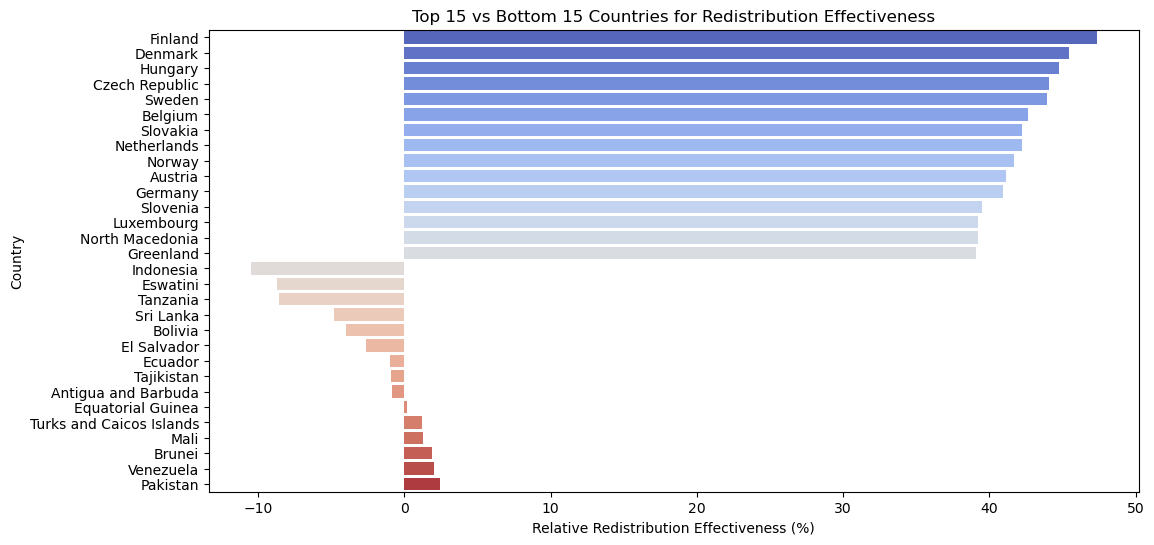

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 and bottom 10 countries based on relative redistribution effectiveness
top_10 = country_redistribution.nlargest(15, "redistribution_relative")
bottom_10 = country_redistribution.nsmallest(15, "redistribution_relative")

# Combine for visualization
top_bottom = pd.concat([top_10, bottom_10])

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="redistribution_relative", y="country", data=top_bottom, palette="coolwarm")

# Labels and title
plt.xlabel("Relative Redistribution Effectiveness (%)")
plt.ylabel("Country")
plt.title("Top 15 vs Bottom 15 Countries for Redistribution Effectiveness")

# Show plot
plt.show()

In [27]:
country_redistribution

,country,redistribution_absolute,redistribution_relative
0,Afghanistan,1.618182,4.852800
1,Albania,11.236000,23.047680
2,Algeria,1.512500,4.051934
3,Andorra,10.231250,25.613626
4,Angola,2.589474,4.972876
...,...,...,...
194,Vietnam,1.450000,3.828041
195,Yemen,1.769565,4.621916
196,Yugoslavia,14.261111,30.390136
197,Zambia,2.453191,4.367764


In [28]:
# country_redistribution.to_json("redistribution_data.json", orient="records")